# Distance plots

Notebook to create plots that show the distance as well as the invocation of the base controller over time.

In [158]:
import pathlib

baseDir = pathlib.Path().resolve()
infilename = str(baseDir) + "/../cmake-build-release/bin/minimal_distances.txt"

def preprocessData():
    data = []
    with open(infilename) as file:
        data = [{'it': int(line.split(',')[0]), 'dist':float(line.split(',')[3]), 'adv':bool(int(line.split(',')[4])), 'training':bool(int(line.split(',')[5]))} for line in file.readlines() if '#' not in line]
    return data

data = preprocessData()
print(str(len(data)))
#print(str(data))

15


In [159]:
from cProfile import label
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

def extend_edges(inarray):
    tmp = inarray
    for i in range(len(inarray)):
        # extend rising edge
        if i != len(inarray)-1 and not inarray[i] and inarray[i+1]:
            tmp[i] = True
        # extend falling edge
        if i != len(inarray)-1 and inarray[i] and not inarray[i+1]:
            tmp[i] = True
    # shift all by one, add initial
    out = [inarray[0]]
    for i in range(len(inarray)-1):
        out.append(tmp[i])
    return out

def plot(data):
    fig, ax = plt.subplots()
    alph = 1.0
    max_iterations = 1000
    
    #ax.hlines(y_limits[var][0], xmin=0, xmax=1000, linewidth=0.1)
    #ax.hlines(y_limits[var][1], xmin=0, xmax=1000, linewidth=0.1)
    use_basecontroller_after_training = extend_edges([ y['adv'] == False and y['training'] == True for y in data if y['it'] < max_iterations])
    use_basecontroller = extend_edges([ y['adv'] == False and y['training'] == False for y in data if y['it'] < max_iterations])
    use_advancedcontroller_after_training = extend_edges([ y['adv'] == True and y['training'] == True for y in data if y['it'] < max_iterations])
    use_advancedcontroller = extend_edges([ y['adv'] == True and y['training'] == False for y in data if y['it'] < max_iterations])
    distances = [ y['dist'] for y in data if y['it'] < max_iterations]
    x = [x+1 for x in range(len(data))]
    
    print(str(len(x)))
    print(str(len(use_advancedcontroller)))
    
    ax.fill_between(x, distances, where=use_basecontroller, alpha=.5*alph, label='used BC, no training', color='orange')
    ax.fill_between(x, distances, where=use_advancedcontroller, alpha=.5*alph, label='used AC, no training', color='green')
    ax.fill_between(x, distances, where=use_basecontroller_after_training, alpha=alph, label='used BC, after training', color='orange')
    ax.fill_between(x, distances, where=use_advancedcontroller_after_training, alpha=alph, label='used AC, after training', color='green')
        
    ax.set_xlabel('time (control cycles)')
    ax.set_ylabel('distance to track boundary')
    ax.legend(loc='upper left')
    
    plt.savefig('distances.png', dpi=600, pad_inches=0.0, bbox_inches='tight')
    plt.show()

[{'it': 1, 'dist': 0.0140751, 'adv': True, 'training': False}, {'it': 2, 'dist': 0.0140448, 'adv': True, 'training': True}, {'it': 3, 'dist': 0.0139003, 'adv': True, 'training': False}, {'it': 4, 'dist': 0.0137558, 'adv': True, 'training': False}, {'it': 5, 'dist': 0.0136113, 'adv': True, 'training': True}, {'it': 6, 'dist': 0.0134667, 'adv': True, 'training': False}, {'it': 7, 'dist': 0.0133222, 'adv': True, 'training': False}, {'it': 8, 'dist': 0.0131777, 'adv': True, 'training': True}, {'it': 9, 'dist': 0.0130332, 'adv': True, 'training': False}, {'it': 10, 'dist': 0.0128887, 'adv': True, 'training': False}, {'it': 11, 'dist': 0.0127441, 'adv': True, 'training': True}, {'it': 12, 'dist': 0.0129403, 'adv': True, 'training': True}, {'it': 13, 'dist': 0.0131365, 'adv': True, 'training': False}, {'it': 14, 'dist': 0.0133326, 'adv': True, 'training': False}, {'it': 15, 'dist': 0.0135288, 'adv': True, 'training': True}]
15
15


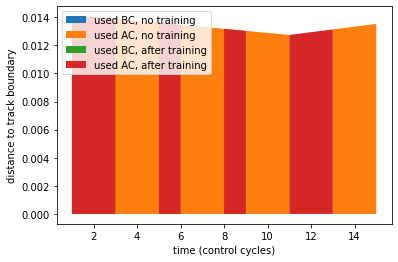

In [160]:
preprocessData()

#print(str(data))

plot(data)